# Задание
<i>Проверить работу Центральной Предельной Теоремы</i>

In [14]:
import scipy.stats as sts
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

<i><b>
    <a href='https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BC%D0%BC%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5'>Гамма-распределение</a>
</b></i><hr>
Рассматривается гамма-распределение с положительными параметрами $k=2$ (аргумент функции <code>sts.gamma a=2.</code>) и $\theta=2.$ (<code>scale=2.</code>).<br>
Заранее посчитаем <a href='https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%BE%D0%B6%D0%B8%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5'>математическое ожидание</a> и <a href='https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D0%BF%D0%B5%D1%80%D1%81%D0%B8%D1%8F_%D1%81%D0%BB%D1%83%D1%87%D0%B0%D0%B9%D0%BD%D0%BE%D0%B9_%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B8%D0%BD%D1%8B'>дисперсию</a>:
$$ {E}[X]=k\theta $$
$$ {D}[X]=k\theta^2 $$

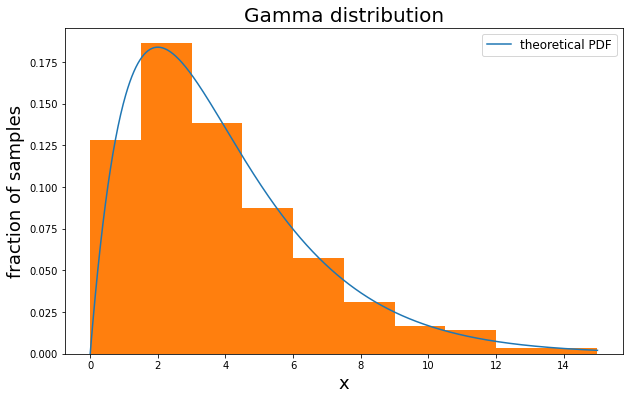

In [69]:
k = 2.
theta = 2.
E = k * theta     # Мат. ожидание
D = k * theta**2  # Дисперсия

x = np.linspace(0, 15, 1000)
gamma_rv = sts.gamma(a=k, scale=theta)

plt.figure(figsize=(10, 6))
plt.xlabel('x', fontsize=18)
plt.ylabel('fraction of samples', fontsize=18)
plt.title('Gamma distribution', fontsize=20)

# График плотности вероятности
plt.plot(x, gamma_rv.pdf(x), label='theoretical PDF')
plt.legend(loc='best', fontsize=12)

# Гистограмма по выборке объёмом n=1000
n = 1000
sample = gamma_rv.rvs(size=n)

plt.hist(sample, range=(0, 15), density=True)
plt.show()

<i><b>Оценим распределение выборочного среднего рассматриваемой случайной величины при разных объёмах выборок n=(5, 10, 50).</b></i><hr>
Сгенерируем 1000 выборок объёмом n и построим гистограммы распределений их <a href='https://ru.wikipedia.org/wiki/%D0%92%D1%8B%D0%B1%D0%BE%D1%80%D0%BE%D1%87%D0%BD%D0%BE%D0%B5_%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B5%D0%B5'>выборочных средних</a>.
Также, используя теоретические значения дисперсии и мат. ожидания (см. пред. п.) исходного распределения, посчитаем значения параметров <a href='https://ru.wikipedia.org/wiki/%D0%9D%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5'>нормальных распределений</a> ($\mu$ и $\sigma^2$), которыми, согласно <a href='https://ru.wikipedia.org/wiki/%D0%A6%D0%B5%D0%BD%D1%82%D1%80%D0%B0%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B5%D0%BC%D0%B0'>центральной предельной теореме</a>, приближается распределение выборочных средних.

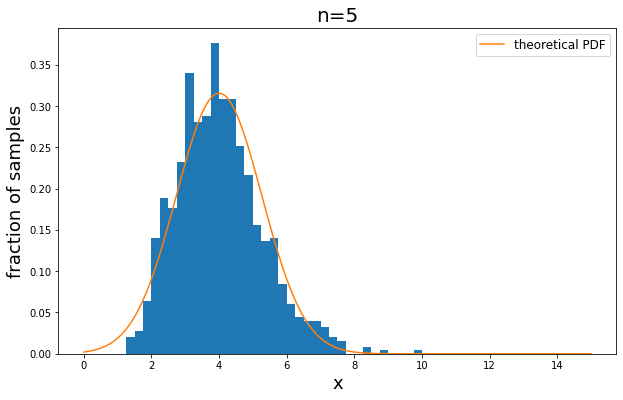

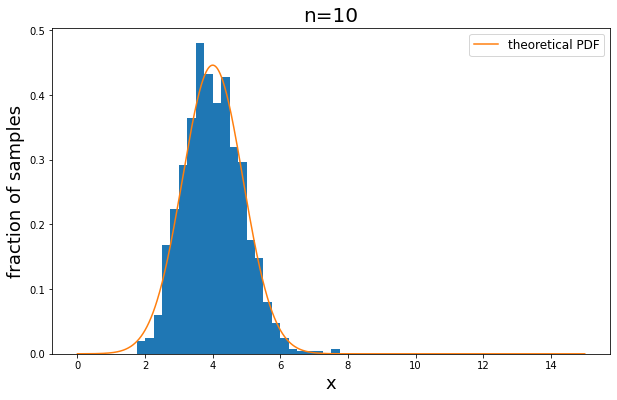

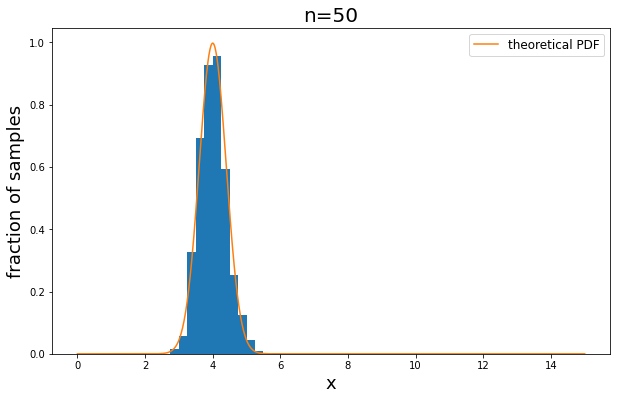

In [74]:
sample_size = [5, 10, 50]
number = 1000 # кол-во выборок для каждого объёма

for size in sample_size:
    means = []
    
    for num in range(number):
        sample = gamma_rv.rvs(size=size) # генерируем выборку
        sample_mean = sum(sample) / size # считаем выборочное среднее
        means.append(sample_mean)        # записываем значение в массив
    
    # Параметры нормального распределения
    mu = E
    sigma = np.sqrt(D / size) # считаем стандартное отклонение, а не дисперсию!
    norm_rv = sts.norm(loc=mu, scale=sigma)
    
    plt.figure(figsize=(10, 6))
    plt.xlabel('x', fontsize=18)
    plt.ylabel('fraction of samples', fontsize=18)
    plt.title('n='+str(size), fontsize=20)
    
    plt.hist(means, bins=60, range=(0, 15), density=True) # гистограмма для каждого объёма отдельно
    plt.plot(x, norm_rv.pdf(x), label='theoretical PDF')  # плотность вероятности нормального распределения
    plt.legend(loc='best', fontsize=12)
    plt.show()        

# Вывод
Можно заметить, что <b>с ростом объёма</b> выборки n <b>точность</b> аппроксимации распределения выборочных средних нормальным <b>возрастает</b>, то есть при большем n гамма-распределение "хорошо" приближается нормальным.